In [1]:
import numpy as np

Creating a single band random grid

In [2]:
num_rows, num_columns = 100, 100

In [3]:
single_data = np.random.rand(num_rows, num_columns) * 255
single_data = single_data.astype(np.uint8)
single_data

array([[174,  90,   1, ...,  26, 147, 189],
       [227, 197, 160, ...,  94,  52, 165],
       [ 56,   6, 194, ..., 156, 136,  52],
       ...,
       [145,  94, 162, ..., 167, 176,  61],
       [229, 157,  70, ...,  74, 220, 179],
       [150,  14,  19, ...,  71,   3, 101]], dtype=uint8)

Creating a triple band random grid

In [4]:
red_data = np.random.rand(num_rows, num_columns) * 255
green_data = np.random.rand(num_rows, num_columns) * 255
blue_data = np.random.rand(num_rows, num_columns) * 255

In [5]:
rgb_data = np.stack([red_data, green_data, blue_data], axis = -1).astype(np.uint8)

In [6]:
rgb_data

array([[[113, 144,  37],
        [ 47, 186, 250],
        [ 77, 127, 184],
        ...,
        [232, 187,  52],
        [ 22,  23,   5],
        [143, 165,   2]],

       [[126, 155, 202],
        [ 16,  61,  53],
        [ 70,   2, 217],
        ...,
        [210, 203, 205],
        [239,  99, 154],
        [179, 111,  81]],

       [[250, 130,  26],
        [217, 174,  18],
        [227, 160,   5],
        ...,
        [106,  88, 234],
        [ 29, 132,  50],
        [188,  12,   3]],

       ...,

       [[137, 201, 170],
        [ 43,   8, 240],
        [212,  95, 162],
        ...,
        [230, 249, 104],
        [ 78, 103, 170],
        [225, 250,   7]],

       [[ 94, 140, 234],
        [239,  37, 214],
        [ 56, 162, 171],
        ...,
        [ 20, 139,   4],
        [ 19,  66, 113],
        [ 83, 180,  47]],

       [[ 67,  60,  39],
        [ 36,   6, 236],
        [ 26, 233,  68],
        ...,
        [ 74,  12, 178],
        [136, 215,  16],
        [ 47, 139, 147]]

In [7]:
len(rgb_data)

100

In [8]:
rgb_data[10][10]

array([ 46, 105, 251], dtype=uint8)

Spatial Referencing and Saving Raster Data

In [11]:
pip install rasterio 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/25.4 MB 825.8 kB/s eta 0:00:31
   ---------------------------------------- 0.1/25.4 MB 939.4 kB/s eta 0:00:27
   ---------------------------------------- 0.2/25.4 MB 1.4 MB/s eta 0:00:19
    --------------------------------------- 0.3/25.4 MB 1.6 MB/s eta 0:00:17
    --------------------------------------- 0.4/25.4 MB 1.5 MB/s eta 0:00:17
    --------------------------------------- 0.5/25.4 MB 1.7 MB/s eta 0:00:15
   - -------------------------------------- 0.7/25.4 MB 1.9 MB/s eta 0:00:14
   - -------------------------------------- 0.8/25.4 MB 1.9 MB/s eta 0:00:13
   - -------------------------------------- 0.9/25.4 MB 2.0 MB/s eta 0:00:13
   - -------------------------------------- 1.0/25.4 MB 2.1 MB/s eta 0:00:12
   - ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
import rasterio

In [13]:
from rasterio.transform import from_origin

Creating single band raster data structure

In [14]:
transform = from_origin(0,100,1,1)
type(transform)

affine.Affine

In [15]:
meta = {
    'driver'  : 'GTiff',
    'height'  : single_data.shape[0],
    'width'   : single_data.shape[1],
    'count'   : 1,
    'dtype'   : 'uint8',
    'crs'     : 'EPSG: 4326',
    'transform': transform
}

meta

{'driver': 'GTiff',
 'height': 100,
 'width': 100,
 'count': 1,
 'dtype': 'uint8',
 'crs': 'EPSG: 4326',
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, -1.0, 100.0)}

In [16]:
with rasterio.open('single_data_raster.tiff', 'w', **meta) as dst:
    dst.write(single_data, 1)

Creating RGB band raster data structure

In [17]:
transform

Affine(1.0, 0.0, 0.0,
       0.0, -1.0, 100.0)

In [18]:
meta_1 = {
    'driver'  : 'GTiff',
    'height'  : rgb_data.shape[0],
    'width'   : rgb_data.shape[1],
    'count'   : 3,
    'dtype'   : 'uint8',
    'crs'     : 'EPSG: 4326',
    'transform': transform
}

meta_1

{'driver': 'GTiff',
 'height': 100,
 'width': 100,
 'count': 3,
 'dtype': 'uint8',
 'crs': 'EPSG: 4326',
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, -1.0, 100.0)}

In [21]:
with rasterio.open('rgb_data_raster.tiff', 'w', **meta_1) as dst:
    dst.write(rgb_data[:, :, 0], 1)
    dst.write(rgb_data[:, :, 1], 2)
    dst.write(rgb_data[:, :, 2], 3)

Reading and Interpreting single band raster data

In [22]:
raster_file = 'single_data_raster.tiff'

In [25]:
with rasterio.open(raster_file) as datasets:
    width = datasets.width
    height = datasets.height
    number_bands = datasets.count
    dtype = datasets.dtypes[0]
    crs = datasets.crs
    transform = datasets.transform

    band_data = datasets.read(1)

In [26]:
width 

100

In [27]:
height

100

In [28]:
transform

Affine(1.0, 0.0, 0.0,
       0.0, -1.0, 100.0)

In [29]:
band_data

array([[174,  90,   1, ...,  26, 147, 189],
       [227, 197, 160, ...,  94,  52, 165],
       [ 56,   6, 194, ..., 156, 136,  52],
       ...,
       [145,  94, 162, ..., 167, 176,  61],
       [229, 157,  70, ...,  74, 220, 179],
       [150,  14,  19, ...,  71,   3, 101]], dtype=uint8)

Reading and Interpreting single band raster data

In [30]:
raster_file_1 = 'rgb_data_raster.tiff'

In [31]:
with rasterio.open(raster_file_1) as datasets:
    width = datasets.width
    height = datasets.height
    number_bands = datasets.count
    dtype = datasets.dtypes[0]
    crs = datasets.crs
    transform = datasets.transform

    red_data = datasets.read(1)
    green_data = datasets.read(2)
    blue_data = datasets.read(3)

In [32]:
red_data

array([[113,  47,  77, ..., 232,  22, 143],
       [126,  16,  70, ..., 210, 239, 179],
       [250, 217, 227, ..., 106,  29, 188],
       ...,
       [137,  43, 212, ..., 230,  78, 225],
       [ 94, 239,  56, ...,  20,  19,  83],
       [ 67,  36,  26, ...,  74, 136,  47]], dtype=uint8)

In [33]:
height, width, crs

(100,
 100,
 CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'))

In [35]:
rgb_data = np.stack([red_data, green_data, blue_data], axis = -1)

In [36]:
rgb_data

array([[[113, 144,  37],
        [ 47, 186, 250],
        [ 77, 127, 184],
        ...,
        [232, 187,  52],
        [ 22,  23,   5],
        [143, 165,   2]],

       [[126, 155, 202],
        [ 16,  61,  53],
        [ 70,   2, 217],
        ...,
        [210, 203, 205],
        [239,  99, 154],
        [179, 111,  81]],

       [[250, 130,  26],
        [217, 174,  18],
        [227, 160,   5],
        ...,
        [106,  88, 234],
        [ 29, 132,  50],
        [188,  12,   3]],

       ...,

       [[137, 201, 170],
        [ 43,   8, 240],
        [212,  95, 162],
        ...,
        [230, 249, 104],
        [ 78, 103, 170],
        [225, 250,   7]],

       [[ 94, 140, 234],
        [239,  37, 214],
        [ 56, 162, 171],
        ...,
        [ 20, 139,   4],
        [ 19,  66, 113],
        [ 83, 180,  47]],

       [[ 67,  60,  39],
        [ 36,   6, 236],
        [ 26, 233,  68],
        ...,
        [ 74,  12, 178],
        [136, 215,  16],
        [ 47, 139, 147]]

Visualizing single and multi band raster data

In [37]:
import matplotlib.pyplot as plt

In [38]:
raster_file = 'single_data_raster.tiff'
with rasterio.open(raster_file) as datasets:
    band_data = datasets.read(1)

type(band_data)

numpy.ndarray

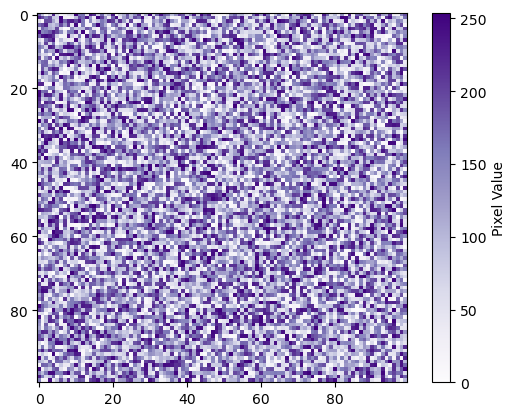

In [39]:
plt.imshow(band_data, cmap = 'Purples')
plt.colorbar(label = 'Pixel Value')

In [40]:
raster_file_1 = 'rgb_data_raster.tiff'
with rasterio.open(raster_file_1) as datasets:
    red_data = datasets.read(1)
    green_data = datasets.read(2)
    blue_data = datasets.read(3)
    rgb_data = np.stack([red_data, green_data, blue_data], axis = -1)

type(rgb_data)

numpy.ndarray

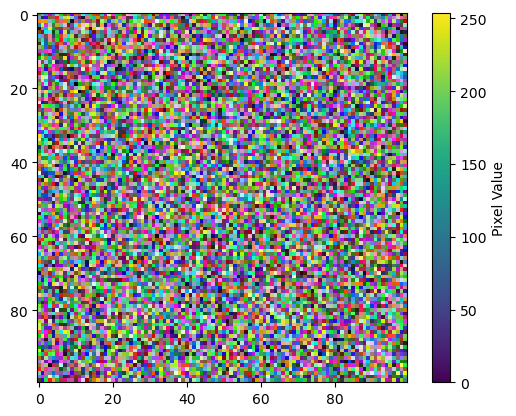

In [41]:
plt.imshow(rgb_data)
plt.colorbar(label = 'Pixel Value')

(-0.5, 99.5, 99.5, -0.5)

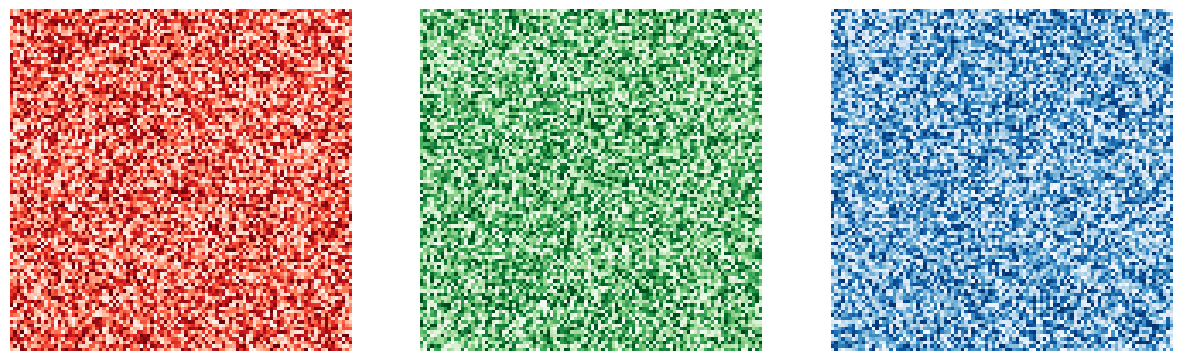

In [43]:
f, ax = plt.subplots(1, 3, figsize = (15,7))

ax[0].imshow(red_data, cmap = 'Reds')
ax[0].axis('off')

ax[1].imshow(green_data, cmap = 'Greens')
ax[1].axis('off')

ax[2].imshow(blue_data, cmap = 'Blues')
ax[2].axis('off')